# Python for Data Science
## Session 8
### Plotting


---

### Matplotlib and Seaborn

**Matplotlib** is the most extended plotting tool in the Python community. While **Maptplotlib** can be call through **Pandas**, **Seaborn** offers a tight integration with **Pandas**.

**Seaborn**, built on top of **Matplotlib**, can be seen as a **Matplotlib** with stereoids, where its main contribution is to simplify heavy tasks (complex to do them with just **Matplotlib**) and provide enhanced visualizations (cooler styles and color palettes). 

### Matplotlib exercises

Let's do some plotting:

- Find out the amount of students of the top 5 universities in Executive Education (2024). Use "Executive Education 2024" published by Financial Times. Plot the results in a figure that includes title, xlabel, ylabel and legend, and try to use the university color for each of one. If you don't find the exact results, just use a close one.

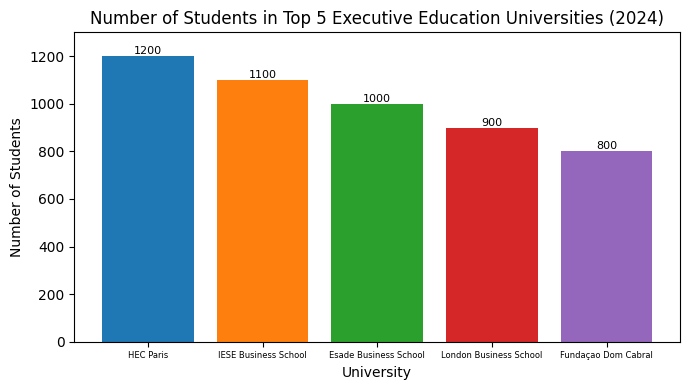

In [24]:
import matplotlib.pyplot as plt

# Data
universities = ['HEC Paris', 'IESE Business School', 'Esade Business School', 'London Business School', 'Fundaçao Dom Cabral']
students = [1200, 1100, 1000, 900, 800]
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD']  # Different colors for each bar

# Create bar graph
fig, ax = plt.subplots(figsize=(7, 4))
bars = ax.bar(universities, students, color=colors)

# Add labels and title
ax.set_title('Number of Students in Top 5 Executive Education Universities (2024)')
ax.set_xlabel('University')
ax.set_ylabel('Number of Students')
ax.set_ylim(0, 1300)  # Adjust the y-axis limit as needed

# Set font size of the university names on the x-axis
plt.xticks(fontsize=6)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom', color='black', fontsize=8)

# Display the plot
plt.tight_layout()
plt.show()


In [3]:
# Data to plot
import pandas as pd
import numpy as np

data = {
    'Student Name': ['Amelie', 'Edgar', 'Jordi', 'Marçal', 'Pep', 'Jaume', 'Marco', 
                     'Ludmila', 'Bastian', 'Marc', 'Gerardo', 'Javier', 'Frank', 'Julia'],
    'Course': ['Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science'],
    'Grade': [85, 92, 78, 88, 91, 84, 73, 95, 90, 80, 85, 87, 89, 92],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female'],
    'Study Time': [15, 20, 10, 8, 18, 14, 11, 16, 19, 13, 16, 12, 17, 15],
    'Age': [22, 21, 23, 22, 20, 24, 22, 21, 23, 21, 22, 22, 21, 20]
}

df = pd.DataFrame(data)
df.head(5)

,Student Name,Course,Grade,Gender,Study Time,Age
0,Amelie,Artificial Intelligence,85,Female,15,22
1,Edgar,Python for Data Science,92,Male,20,21
2,Jordi,Cloud Computing,78,Male,10,23
3,Marçal,Computer Vision,88,Male,8,22
4,Pep,Artificial Intelligence,91,Male,18,20


## Exercises
### Seaborn

Home exercises. Note that you may need to also use pandas to answer some of the questions. 

1. Create a *lineplot* showing how **Study Time** varies by **Student Name**. Which student has the highest study time?


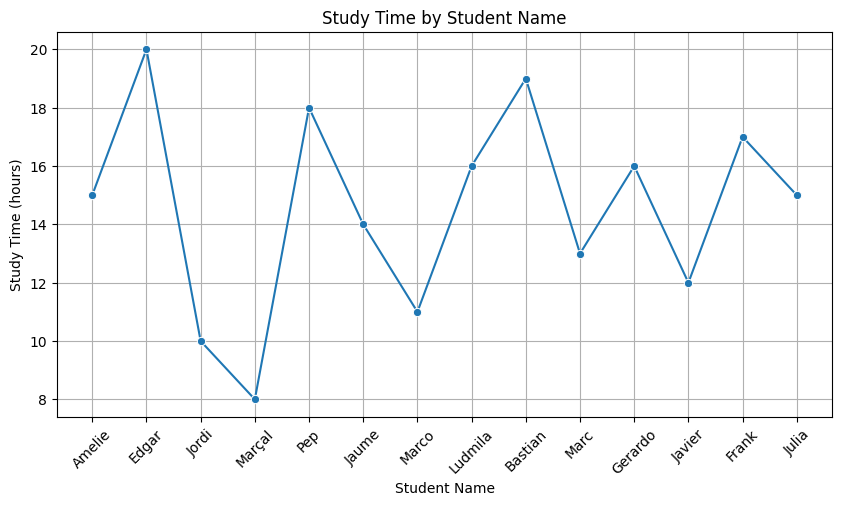

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Student Name', y='Study Time', marker='o')
plt.title('Study Time by Student Name')
plt.xlabel('Student Name')
plt.ylabel('Study Time (hours)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [19]:
highest_study_time = df.loc[df['Study Time'].idxmax()]
print(f"The student with the highest study time is {highest_study_time['Student Name']} with {highest_study_time['Study Time']} hours.")

The student with the highest study time is Edgar with 20 hours.


2. Plot a histogram (*histplot*) of **Grade** and determine which grade range has the highest frequency of students.

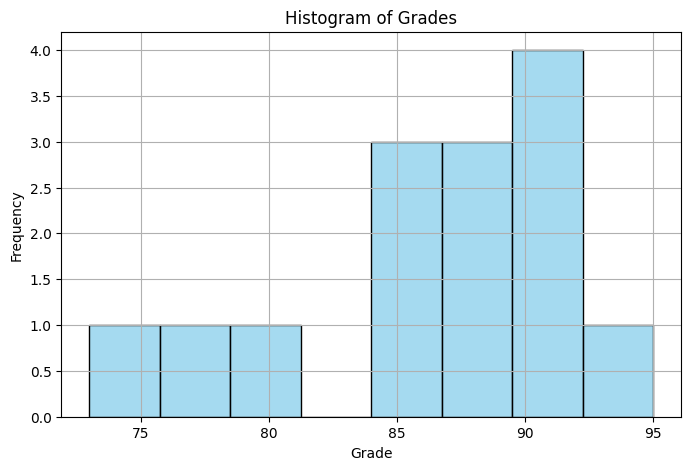

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Grade'], bins=8, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [25]:
# We determine the grade range with the highest frequency of students
grade_counts = df['Grade'].value_counts(bins=8).sort_index()
highest_frequency_range = grade_counts.idxmax()
highest_frequency = grade_counts.max()

print(f"The grade range with the highest frequency of students is {highest_frequency_range} with {highest_frequency} students.")

The grade range with the highest frequency of students is (89.5, 92.25] with 4 students.


By dividing the grades into equal-width bins, we can observe the frequency of students falling within each grade interval. In this case, the analysis reveals that the grade range with the highest frequency of students is 89.5 to 92.25.

3. Create an ECDF plot (*ecdfplot*) for **Grade**. What is the percentage of students scoring less than 85?

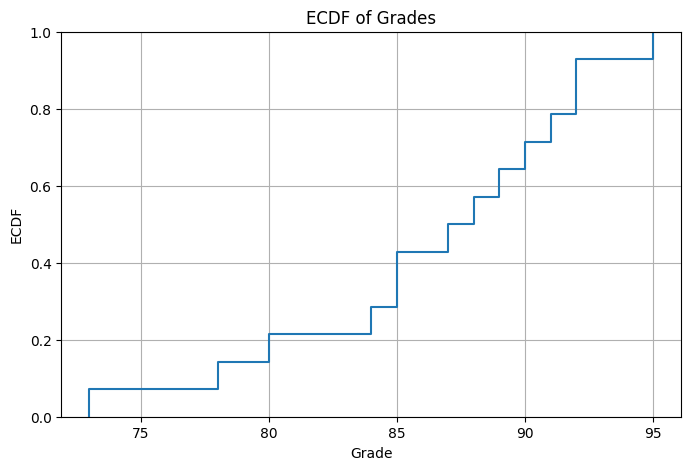

In [29]:
plt.figure(figsize=(8, 5))
sns.ecdfplot(data=df, x='Grade')
plt.title('ECDF of Grades')
plt.xlabel('Grade')
plt.ylabel('ECDF')
plt.grid(True)
plt.show()

In [ ]:
# We determine the percentage of students scoring less than 85
percentage_less_than_85 = (df[df['Grade'] < 85].shape[0] / df.shape[0]) * 100
print(f"The percentage of students scoring less than 85 is {percentage_less_than_85:.2f}%.")

The percentage of students scoring less than 85 is 28.57%.


4. Create a *stripplot* showing **Grade** distribution for each **Course**. Which course has the most spread in grades?


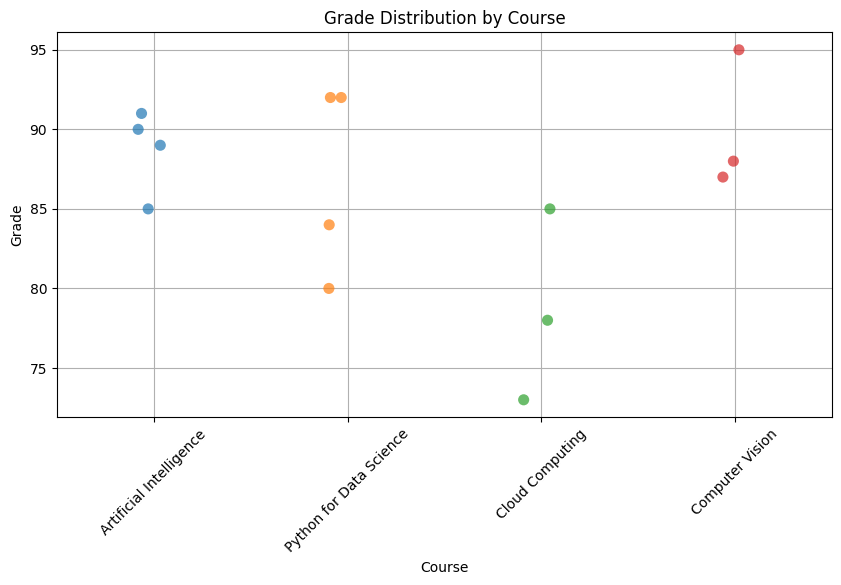

In [ ]:
plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x='Course', y='Grade',hue='Course', size=8, alpha=0.7)
plt.title('Grade Distribution by Course')
plt.xlabel('Course')
plt.ylabel('Grade')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [33]:
# Calculate the spread (range) of grades for each course
grade_spread = df.groupby('Course')['Grade'].apply(lambda x: x.max() - x.min())
most_spread_course = grade_spread.idxmax()

print(f"The course with the most spread in grades is {most_spread_course} with a spread of {grade_spread[most_spread_course]} points.")


The course with the most spread in grades is Cloud Computing with a spread of 12 points.


5. Create a *swarmplot* to show the relationship between Gender and **Study Time**. Which gender has a higher average study time?

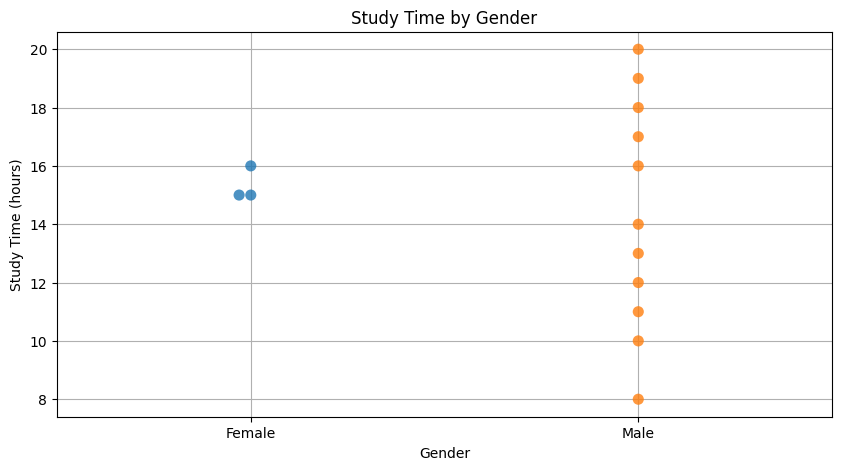

In [61]:
plt.figure(figsize=(10, 5))
sns.swarmplot(data=df, x='Gender', y='Study Time',hue='Gender', size=8, alpha=0.8)
plt.title('Study Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Study Time (hours)')
plt.grid(True)
plt.show()

In [73]:
# We calculate the average study time for each gender
average_study_time = df.groupby('Gender')['Study Time'].mean()
gender_with_higher_average = average_study_time.idxmax()

print(f"The gender with the higher average study time is {gender_with_higher_average} with an average study time of {average_study_time[gender_with_higher_average]:.2f} hours," 
      f"\nwhile men have an average study time of {average_study_time['Male']:.2f} hours.")

The gender with the higher average study time is Female with an average study time of 15.33 hours,
while men have an average study time of 14.36 hours.


6. Plot a *pointplot* to show the average **Grade** for each Course. Which course has the highest average grade?

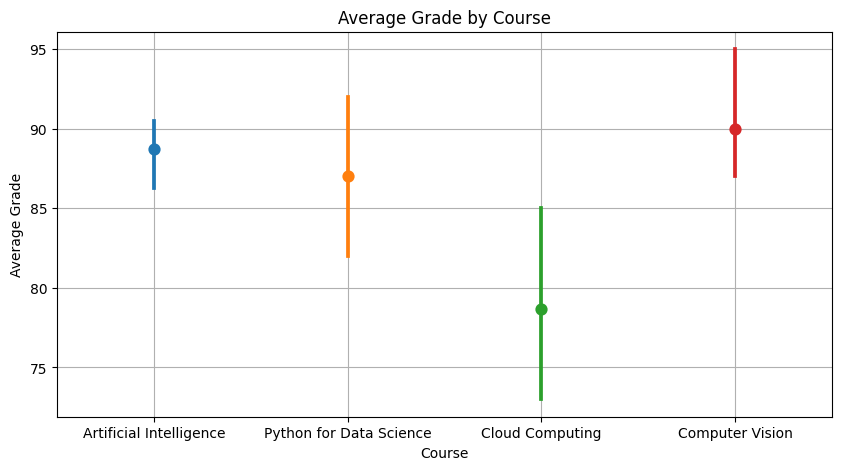

In [85]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=df, x='Course', y='Grade', estimator=np.mean, hue='Course')
plt.title('Average Grade by Course')
plt.xlabel('Course')
plt.ylabel('Average Grade')
plt.grid(True)
plt.show()


In [88]:
average_grade_per_course = df.groupby('Course')['Grade'].mean()
highest_average_grade_course = average_grade_per_course.idxmax()

print(f"The course with the highest average grade is {highest_average_grade_course} with an average grade of {average_grade_per_course[highest_average_grade_course]:.2f},"
      f"\nand the course with the lowest average grade is {average_grade_per_course.idxmin()} with an average grade of {average_grade_per_course.min():.2f}.")


The course with the highest average grade is Computer Vision with an average grade of 90.00,
and the course with the lowest average grade is Cloud Computing with an average grade of 78.67.
